# Set up Euler Angle Matrix

In [1]:
from sympy import symbols, Matrix, sin, cos, trigsimp, diff
alpha = symbols('alpha')
beta = symbols('beta')
psib = symbols('psi_b')
phi = symbols('phi')
theta = symbols('theta')
psi = symbols('psi')
mu = Matrix([sin(beta)*cos(-psib),sin(beta)*sin(-psib),cos(beta)])
Dmat = Matrix([[cos(phi),sin(phi),0],[-sin(phi),cos(phi),0],[0,0,1]])
Cmat = Matrix([[1,0,0],[0,cos(theta),sin(theta)],[0,-sin(theta),cos(theta)]])
Bmat = Matrix([[cos(psi),sin(psi),0],[-sin(psi),cos(psi),0],[0,0,1]])
Amat = Matrix([[cos(alpha),0,sin(alpha)],[0,1,0],[-sin(alpha),0,cos(alpha)]])
totMat= Bmat*Cmat*Dmat
muXYZ = trigsimp(Amat.T*totMat.T*mu)
muXYZ

Matrix([
[-sin(alpha)*sin(beta)*sin(theta)*sin(psi - psi_b) - sin(alpha)*cos(beta)*cos(theta) - sin(beta)*sin(phi)*sin(psi - psi_b)*cos(alpha)*cos(theta) + sin(beta)*cos(alpha)*cos(phi)*cos(psi - psi_b) + sin(phi)*sin(theta)*cos(alpha)*cos(beta)],
[                                                                                                                       sin(beta)*sin(phi)*cos(psi - psi_b) + sin(beta)*sin(psi - psi_b)*cos(phi)*cos(theta) - sin(theta)*cos(beta)*cos(phi)],
[-sin(alpha)*sin(beta)*sin(phi)*sin(psi - psi_b)*cos(theta) + sin(alpha)*sin(beta)*cos(phi)*cos(psi - psi_b) + sin(alpha)*sin(phi)*sin(theta)*cos(beta) + sin(beta)*sin(theta)*sin(psi - psi_b)*cos(alpha) + cos(alpha)*cos(beta)*cos(theta)]])

In [2]:
trigsimp(muXYZ.subs(theta,0))

Matrix([
[-sin(alpha)*cos(beta) + sin(beta)*cos(alpha)*cos(phi + psi - psi_b)],
[                                   sin(beta)*sin(phi + psi - psi_b)],
[ sin(alpha)*sin(beta)*cos(phi + psi - psi_b) + cos(alpha)*cos(beta)]])

In [3]:
trigsimp((muXYZ[1]/muXYZ[0]).subs([(theta,0),(psi,0),(psib,0)]))

sin(beta)*sin(phi)/(-sin(alpha)*cos(beta) + sin(beta)*cos(alpha)*cos(phi))

In [4]:
trigsimp(muXYZ[1]/muXYZ[0])

(sin(beta)*sin(phi)*cos(psi - psi_b) + sin(beta)*sin(psi - psi_b)*cos(phi)*cos(theta) - sin(theta)*cos(beta)*cos(phi))/(-sin(alpha)*sin(beta)*sin(theta)*sin(psi - psi_b) - sin(alpha)*cos(beta)*cos(theta) - sin(beta)*sin(phi)*sin(psi - psi_b)*cos(alpha)*cos(theta) + sin(beta)*cos(alpha)*cos(phi)*cos(psi - psi_b) + sin(phi)*sin(theta)*cos(alpha)*cos(beta))

In [5]:
from sympy.printing.pycode import pycode
from textwrap import fill
jfill=(lambda s: fill(s,subsequent_indent=' '*15,width=80))
print('''import numpy as np
def muXYZfunk(alpha,beta,psi_b,theta,psi,phi): 
    return (%s, 
            %s, 
            %s)''' % (jfill(pycode(muXYZ[0]).replace('math','np')),
                      jfill(pycode(muXYZ[1]).replace('math','np')),
                      jfill(pycode(muXYZ[2]).replace('math','np'))))
     


import numpy as np
def muXYZfunk(alpha,beta,psi_b,theta,psi,phi): 
    return (-np.sin(alpha)*np.sin(beta)*np.sin(theta)*np.sin(psi - psi_b) -
               np.sin(alpha)*np.cos(beta)*np.cos(theta) -
               np.sin(beta)*np.sin(phi)*np.sin(psi -
               psi_b)*np.cos(alpha)*np.cos(theta) +
               np.sin(beta)*np.cos(alpha)*np.cos(phi)*np.cos(psi - psi_b) +
               np.sin(phi)*np.sin(theta)*np.cos(alpha)*np.cos(beta), 
            np.sin(beta)*np.sin(phi)*np.cos(psi - psi_b) + np.sin(beta)*np.sin(psi -
               psi_b)*np.cos(phi)*np.cos(theta) -
               np.sin(theta)*np.cos(beta)*np.cos(phi), 
            -np.sin(alpha)*np.sin(beta)*np.sin(phi)*np.sin(psi - psi_b)*np.cos(theta) +
               np.sin(alpha)*np.sin(beta)*np.cos(phi)*np.cos(psi - psi_b) +
               np.sin(alpha)*np.sin(phi)*np.sin(theta)*np.cos(beta) +
               np.sin(beta)*np.sin(theta)*np.sin(psi - psi_b)*np.cos(alpha) +
               np.cos(alpha)*np.cos(beta)*np.

## Copy the code from the box above into the box below.

In [6]:
import numpy as np
def muXYZfunk(alpha,beta,psi_b,theta,psi,phi): 
    return (-np.sin(alpha)*np.sin(beta)*np.sin(theta)*np.sin(psi - psi_b) -
               np.sin(alpha)*np.cos(beta)*np.cos(theta) -
               np.sin(beta)*np.sin(phi)*np.sin(psi -
               psi_b)*np.cos(alpha)*np.cos(theta) +
               np.sin(beta)*np.cos(alpha)*np.cos(phi)*np.cos(psi - psi_b) +
               np.sin(phi)*np.sin(theta)*np.cos(alpha)*np.cos(beta), 
            np.sin(beta)*np.sin(phi)*np.cos(psi - psi_b) + np.sin(beta)*np.sin(psi -
               psi_b)*np.cos(phi)*np.cos(theta) -
               np.sin(theta)*np.cos(beta)*np.cos(phi), 
            -np.sin(alpha)*np.sin(beta)*np.sin(phi)*np.sin(psi - psi_b)*np.cos(theta) +
               np.sin(alpha)*np.sin(beta)*np.cos(phi)*np.cos(psi - psi_b) +
               np.sin(alpha)*np.sin(phi)*np.sin(theta)*np.cos(beta) +
               np.sin(beta)*np.sin(theta)*np.sin(psi - psi_b)*np.cos(alpha) +
               np.cos(alpha)*np.cos(beta)*np.cos(theta))

# Triaxial Precession Formulae

In [7]:
i1,i2,i3=symbols('I_1'),symbols('I_2'),symbols('I_3')
theta0=symbols('theta_0')
M=symbols('M')
E=symbols('E')
k2=symbols('k^2')
k2=(i2-i1)*(2*E*i3-M*M)/(i3-i2)/(M*M-2*E*i1)
k2

(-I_1 + I_2)*(2*E*I_3 - M**2)/((-I_2 + I_3)*(-2*E*I_1 + M**2))

In [8]:
from sympy.solvers import solve
c2=symbols('c2')
Esol=solve(cos(theta0)**2-i3*(M*M-2*E*i1)/(M*M*(i3-i1)),E)[0]
Esol

M**2*(I_1*cos(theta_0)**2 + I_3*sin(theta_0)**2)/(2*I_1*I_3)

In [9]:
trigsimp(2*Esol-M*M*sin(theta0)**2/i1-M*M*cos(theta0)**2/i3)


0

In [10]:
k2simp=trigsimp(k2.subs(E,Esol))

In [11]:
k2simp=trigsimp((k2simp*i1/i3).expand())*i3/i1

In [12]:
k2simp

I_3*(I_1 - I_2)*tan(theta_0)**2/(I_1*(I_2 - I_3))

In [13]:
from sympy import latex
print(latex(k2simp))

\frac{I_{3} \left(I_{1} - I_{2}\right) \tan^{2}{\left(\theta_{0} \right)}}{I_{1} \left(I_{2} - I_{3}\right)}


In [14]:
K=symbols('K')
Omega3=symbols('Omega_3')
T2=(4*K)**2*i1*i2*i3/(i3-i2)/(M*M-2*E*i1)
trigsimp(1/T2.subs(E,Esol).subs(M,i3*Omega3/cos(theta0)))
            

Omega_3**2*(-I_1 + I_3)*(-I_2 + I_3)/(16*I_1*I_2*K**2)

In [15]:
trigsimp(1/T2.subs(E,Esol))

M**2*(-I_2 + I_3)*(-I_1/I_3 + 1)*cos(theta_0)**2/(16*I_1*I_2*I_3*K**2)

In [16]:
dphidt=M/i1*cos(psi)**2+M/i2*sin(psi)**2
trigsimp((dphidt*i1*i2).expand())/i1/i2

(I_1*M*sin(psi)**2 + I_2*M*cos(psi)**2)/(I_1*I_2)

# Her X-1 Stuff

In [17]:
from scipy.special import ellipk,  ellipj
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt

In [18]:
medvalues1=np.array([9.61322513e-02, 5.23090580e+01, 1.44957752e+01, 5.51963549e+01,
       6.47802633e-01])
medvalues2=np.array([ 0.18052481, 8.94730798e+01 ,  3.97228909, 41.8705339 ,  0.81523094])   
medvalues3=np.array([9.10284472e-02, 5.56038320e+01, 1.59448999e+01, 4.66666991e+01,
       6.72612946e-01])


Text(0, 0.5, '$\\Delta \\nu/\\nu_{precession}$')

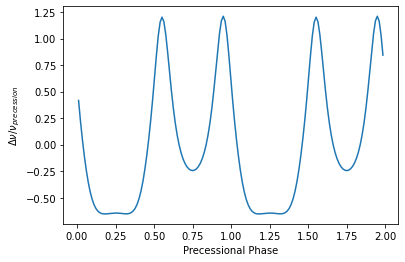

In [19]:
pre_phase=np.linspace(0,4*np.pi,3600-1)
DeltaI3=6.7e-7
DeltaI2=2.7e-7
theta0=np.radians(50)
m,n=DeltaI2/(DeltaI3-DeltaI2)*np.tan(theta0)**2,np.sqrt((DeltaI3-DeltaI2)/DeltaI3)
_tau=pre_phase*ellipk(m)*2/np.pi
sn,cn,dn,ph=ellipj(_tau,m)
_psi=np.arctan2(np.sqrt(n)*cn,sn)
_excessphase=-np.cumsum(np.cos(_psi)**2-np.mean(np.cos(_psi)[:-1]**2))*(_tau[1]-_tau[0])*DeltaI2/np.sqrt(DeltaI3*(DeltaI3-DeltaI2))/np.cos(theta0)
mux,muy,muz=muXYZfunk(*np.radians([110,30]),np.pi/2,np.arccos(np.cos(theta0)*dn),_psi,40*pre_phase+_excessphase)
aafunk=UnivariateSpline(pre_phase/2/np.pi,muy,s=0)
rrs=aafunk.roots()
rrbar=(rrs[1:]+rrs[:-1])/2
rrdiff=(rrs[1:]-rrs[:-1])
plt.plot(rrbar,1/(rrdiff*2)-40)
#plt.ylim(-60,60)
plt.xlabel('Precessional Phase')
plt.ylabel(r'$\Delta \nu/\nu_{precession}$')      

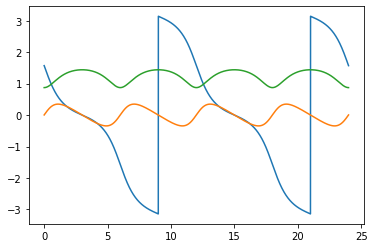

In [20]:
plt.plot(_tau,_psi)
plt.plot(_tau,_excessphase)
plt.plot(_tau,np.arccos(np.cos(theta0)*dn))

Text(0, 0.5, '$\\Delta \\nu/\\nu_{precession}$')

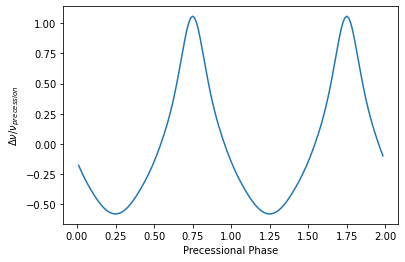

In [21]:
pre_phase=np.linspace(0,4*np.pi,3600-1)
DeltaI3=6.7e-7
DeltaI2=2.7e-7
theta0=np.radians(9)
m,n=DeltaI2/(DeltaI3-DeltaI2)*np.tan(theta0)**2,np.sqrt((DeltaI3-DeltaI2)/DeltaI3)
_tau=pre_phase*ellipk(m)*2/np.pi
sn,cn,dn,ph=ellipj(_tau,m)
_psi=np.arctan2(np.sqrt(n)*cn,sn)
_excessphase=-np.cumsum(np.cos(_psi)**2-np.mean(np.cos(_psi)[:-1]**2))*(_tau[1]-_tau[0])*DeltaI2/np.sqrt(DeltaI3*(DeltaI3-DeltaI2))/np.cos(theta0)
mux,muy,muz=muXYZfunk(*np.radians([110,7]),np.pi/2,np.arccos(np.cos(theta0)*dn),_psi,40*pre_phase+_excessphase)
aafunk=UnivariateSpline(pre_phase/2/np.pi,muy,s=0)
rrs=aafunk.roots()
rrbar=(rrs[1:]+rrs[:-1])/2
rrdiff=(rrs[1:]-rrs[:-1])
plt.plot(rrbar,1/(rrdiff*2)-40)
#plt.ylim(-60,60)
plt.xlabel('Precessional Phase')
plt.ylabel(r'$\Delta \nu/\nu_{precession}$')      

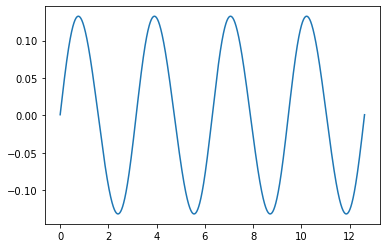

In [22]:
plt.plot(_tau,_excessphase)

# Plot Precesson Models from Her X-1

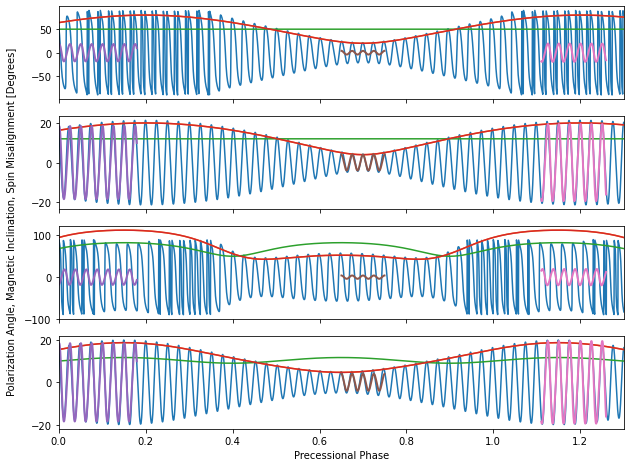

In [23]:
# four models
#
#
angM=110
scaler=1.1

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,sharex=True,figsize=(8*scaler,6*scaler))
pre_phase=np.linspace(0,4*np.pi,3601)

nperiod=40

# plot data
def plotdata(ax,fac=[0,0,0]):
    startstop=np.array([[0.0,0.18],[0.65,0.75],[1.11,1.26]])
    for _i,_m in enumerate([medvalues1,medvalues2,medvalues3]):
        mux,muy,muz=muXYZfunk(np.radians(_m[1]),np.radians(_m[2]),-np.pi*0.5,0,0,nperiod*pre_phase+fac[_i]*np.pi)
        _ok=(pre_phase/2/np.pi>startstop[_i][0]) & (pre_phase/2/np.pi<startstop[_i][1])
        ax.plot((pre_phase/2/np.pi)[_ok],np.degrees(np.arctan(muy/mux))[_ok],label='Epoch %d' % (_i+1),lw=2)

# plot model
def plotmodel(beta,t0,ax,xshift=0.6,DeltaI3=6.7e-7,DeltaI2=2.7e-7,label='Model'):
    theta0=np.radians(t0)
    m,n=DeltaI2/(DeltaI3-DeltaI2)*np.tan(theta0)**2,np.sqrt((DeltaI3-DeltaI2)/DeltaI3)
    _tau=pre_phase*ellipk(m)*2/np.pi
    sn,cn,dn,ph=ellipj(_tau,m)
    _psi=np.arctan2(np.sqrt(n)*cn,sn)
    _excessphase=np.cumsum(np.cos(2*pre_phase)-np.mean(np.cos(2*_psi)))*(_tau[1]-_tau[0])*DeltaI2/np.sqrt(DeltaI3*(DeltaI3-DeltaI2))/np.cos(theta0)
    _theta=np.arccos(np.cos(theta0)*dn)
    mux,muy,muz=muXYZfunk(*np.radians([angM,beta]),np.pi/2,_theta,_psi,nperiod*pre_phase+_excessphase*0)
    ax.plot(pre_phase/2/np.pi-xshift,np.degrees(np.arctan(muy/mux)),label=label)
    ax.plot(pre_phase/2/np.pi-xshift,np.degrees(np.arccos(np.cos(_theta)*np.cos(np.radians(beta))-np.sin(_theta)*np.sin(np.radians(beta))*np.cos(_psi))),label='B')
    #ax.plot(pre_phase/2/np.pi,np.sin(pre_phase-0.66*2*np.pi)*11,label='Elevation')
    #ax.plot(pre_phase/2/np.pi,np.cos(pre_phase-0.28*2*np.pi)*20,label='Elevation')
    ax.plot(pre_phase/2/np.pi-xshift,np.degrees(_theta),label=r'$\gamma$')
    ax.plot(pre_phase/2/np.pi-xshift,np.degrees(np.arccos(np.cos(_theta)*np.cos(np.radians(beta))-np.sin(_theta)*np.sin(np.radians(beta))*np.cos(_psi))),label='B')
# top


plotmodel(30,50,ax1,xshift=0.05,DeltaI2=0)
plotdata(ax1,fac=[1,1,1])

# second

plotmodel(8,12,ax2,xshift=0.05,DeltaI2=0)
plotdata(ax2,fac=[1,1,1])

# third
plotmodel(30,50,ax3,xshift=0.1)
plotdata(ax3,fac=[0,1,0])

# fourth
plotmodel(7,9,ax4,xshift=0.1)
plotdata(ax4,fac=[1,1,1])

#ax4.axhline(17)
ax4.set_xlim(0.0,1.3)
ax4.set_xlabel('Precessional Phase')


#ax4.plot(pre_phase/2/np.pi-xshift,np.degrees(np.arccos(mux*np.cos(np.radians(angM))+muz*np.sin(np.radians(angM)))))

#ax4.legend(loc='upper right')
#ax4.legend()

#fig.text(0.01, 0.525, 'Polarization Angle, Disk Warp, Magnetic Inclination, Spin Misalignment [Degrees]', va='center', rotation='vertical')
fig.text(0.01, 0.525, 'Polarization Angle, Magnetic Inclination, Spin Misalignment [Degrees]', va='center', rotation='vertical')
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout(rect=(0.02,0,1,1))
plt.savefig('figures/models.pdf')